# AutoEncoder(AE)

* 입력데이터의 차원축소를 통해 의미있는 잠재 공간(Latent Space/Manifold)을 학습
 - Encoder 학습을 위해 Decoder를 사용

In [1]:
import warnings
warnings.filterwarnings('ignore')

# I. Load MNIST Dataset

> ## 1) X_train and X_test

In [2]:
from tensorflow.keras.datasets import mnist

(X_train, _), (X_test, _) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [3]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

> ## 2) Normalization and Reshape

In [4]:
X_train = X_train / 255.
X_test = X_test / 255.

X_train = X_train.reshape(60000, 28 * 28)
X_test = X_test.reshape(10000, 28 * 28)

In [5]:
X_train.shape, X_test.shape

((60000, 784), (10000, 784))

# II. Keras Modeling with Functional API

> ## 1) 'Latent Space' Size

In [6]:
encoding_dim = 32

> ## 2) Encoder

* Input

In [7]:
from tensorflow.keras import layers

input_img = layers.Input(shape = (784, ))

* Encoding Layers and Encoding Model

In [8]:
encoded = layers.Dense(256, activation = 'elu')(input_img)
encoded = layers.Dense(128, activation = 'elu')(encoded)
encoded = layers.Dense(encoding_dim, activation = 'elu')(encoded)

> ## 3) Decoder

* Decoding Lyaers and Decoding Model

In [9]:
decoded = layers.Dense(128, activation = 'elu')(encoded)
decoded = layers.Dense(256, activation = 'elu')(decoded)
decoded = layers.Dense(784, activation = 'sigmoid')(decoded)

# III. AutoEncoder Model

> ## 1) 'autoencoder' Model

In [10]:
from tensorflow.keras import models

autoencoder = models.Model(input_img, decoded)

In [11]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 32)                4128      
                                                                 
 dense_3 (Dense)             (None, 128)               4224      
                                                                 
 dense_4 (Dense)             (None, 256)               33024     
                                                                 
 dense_5 (Dense)             (None, 784)               201488

> ## 2) 'encoder' Model

In [12]:
encoder = models.Model(input_img, encoded)

In [13]:
encoder.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 32)                4128      
                                                                 
Total params: 237,984
Trainable params: 237,984
Non-trainable params: 0
_________________________________________________________________


> ## 3) 'decoder' Model

In [14]:
encoded_input = layers.Input(shape = (encoding_dim,))

decoder_layer = autoencoder.layers[-3](encoded_input)
decoder_layer = autoencoder.layers[-2](decoder_layer)
decoder_layer = autoencoder.layers[-1](decoder_layer)

decoder = models.Model(encoded_input, decoder_layer)

In [15]:
decoder.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32)]              0         
                                                                 
 dense_3 (Dense)             (None, 128)               4224      
                                                                 
 dense_4 (Dense)             (None, 256)               33024     
                                                                 
 dense_5 (Dense)             (None, 784)               201488    
                                                                 
Total params: 238,736
Trainable params: 238,736
Non-trainable params: 0
_________________________________________________________________


# IV. Model Fit

> ## 1) Model Compile

In [16]:
autoencoder.compile(loss = 'binary_crossentropy',
                    optimizer = 'adam')

> ## 2) Model Training

* 약 2분

In [17]:
%%time

autoencoder.fit(X_train, X_train,
                epochs = 50,
                batch_size = 256,
                validation_data = (X_test, X_test))

Epoch 1/50
235/235 [==============================] - 6s 10ms/step - loss: 0.1963 - val_loss: 0.1369
Epoch 2/50
235/235 [==============================] - 2s 8ms/step - loss: 0.1258 - val_loss: 0.1149
Epoch 3/50
235/235 [==============================] - 2s 7ms/step - loss: 0.1109 - val_loss: 0.1055
Epoch 4/50
235/235 [==============================] - 1s 5ms/step - loss: 0.1042 - val_loss: 0.1010
Epoch 5/50
235/235 [==============================] - 1s 5ms/step - loss: 0.1003 - val_loss: 0.0981
Epoch 6/50
235/235 [==============================] - 1s 5ms/step - loss: 0.0977 - val_loss: 0.0957
Epoch 7/50
235/235 [==============================] - 2s 7ms/step - loss: 0.0958 - val_loss: 0.0945
Epoch 8/50
235/235 [==============================] - 1s 5ms/step - loss: 0.0943 - val_loss: 0.0929
Epoch 9/50
235/235 [==============================] - 1s 5ms/step - loss: 0.0930 - val_loss: 0.0914
Epoch 10/50
235/235 [==============================] - 1s 5ms/step - loss: 0.0913 - val_loss: 0.089

# V. Model Predict

> ## 1) Imgae Encoding

* Create 'Latent Space'

In [18]:
encoded_imgs = encoder.predict(X_test)

encoded_imgs.shape

313/313 [==============================] - 1s 1ms/step


(10000, 32)

> ## 2) 'Latent Space' Decoding

In [19]:
decoded_imgs = decoder.predict(encoded_imgs)

decoded_imgs.shape

313/313 [==============================] - 1s 1ms/step


(10000, 784)

# VI. Visualization

* 10개의 이미지 데이터를 모델에 적용

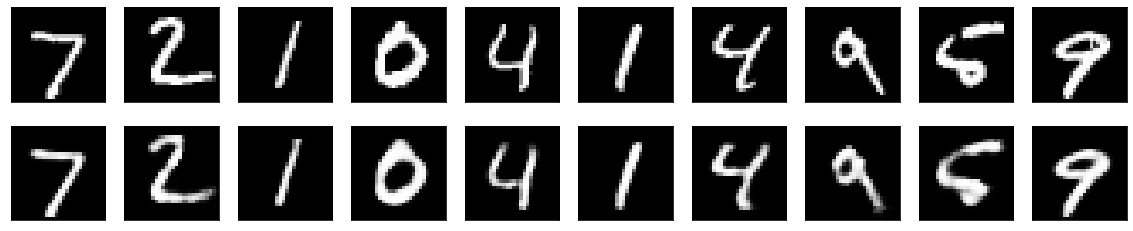

In [20]:
import matplotlib.pyplot as plt

n = 10

plt.figure(figsize = (20, 4))
for i in range(n):

    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

# 
# 
# 
# The End
# 
# 
# 